# Exploring mortality data with heatmaps
### We will study mortality data available from the [Human Mortality Database](https://www.mortality.org/) website, for different countries, at different time intervals.

* Python adaptation of [Kieran Healy](https://kieranhealy.org/blog/archives/2018/12/04/heatmaps-of-mortality-rates) [mortality graphs](https://kieranhealy. org/).

* The data is freely available, but its curators ask users not to share it further themselves.

* We can easily download them using the following lines.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import rankdata
import math

import matplotlib.pyplot as plt

import seaborn as sns

* We are interested in records with mortality data.

* These files are called "Death Rates".

* We will use the file for France.

* The file is `FRATNP.Mx_1x1.txt`.

In [2]:
lex = pd.read_table("FRATNP.Mx_1x1.txt", skiprows=2, sep='\s+', na_values=".")

* Here's what the data looks like.

* For each year and each age we have the corresponding mortality, i.e. the ratio of the population that died at that age to the population that could die at that age.

In [3]:
lex.head()

,Year,Age,Female,Male,Total
0,1816,0,0.186986,0.222931,0.205344
1,1816,1,0.046702,0.046670,0.046685
2,1816,2,0.033928,0.034306,0.034120
3,1816,3,0.022912,0.023155,0.023035
4,1816,4,0.015995,0.016075,0.016035


* If we check the data we will find that the happy people who live from 110 and above are all together at the age `110+'.

* Let's assume it's at 110.

In [4]:
lex.loc[lex['Age'] == '110+', 'Age'] = 110

* We can now convert the `Age` column to an integer.

In [5]:
lex['Age'] = pd.to_numeric(lex['Age'])

* The format the data is currently in is not convenient for visualization purposes.

* We will make a new `DataFrame`, where years will be columns and ages will be rows.

* And we will only keep ages up to 100.

In [6]:
mortality_grid = pd.pivot_table(data=lex[lex['Age'] <= 100], 
                                index='Age',
                                columns='Year',
                                values='Male')
mortality_grid.shape

(101, 203)

* The principle of `DataFrame`:

In [7]:
mortality_grid.head(5)

Year,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Age,,,,,,,,,,,,,,,,,,,,,
0,0.222931,0.217954,0.216629,0.234458,0.213029,0.213841,0.241128,0.221829,0.234507,0.223781,...,0.004172,0.003931,0.003639,0.003808,0.003926,0.003802,0.003989,0.003975,0.004057,0.004199
1,0.046670,0.053905,0.061260,0.066978,0.058200,0.056375,0.059970,0.058001,0.062447,0.064879,...,0.000321,0.000262,0.000287,0.000313,0.000277,0.000288,0.000288,0.000212,0.000284,0.000283
2,0.034306,0.038601,0.041421,0.046210,0.040766,0.041691,0.042485,0.039162,0.043943,0.045941,...,0.000233,0.000198,0.000175,0.000201,0.000184,0.000153,0.000191,0.000211,0.000168,0.000185
3,0.023155,0.027090,0.028248,0.030090,0.027286,0.028215,0.029681,0.026570,0.028650,0.030954,...,0.000172,0.000151,0.000116,0.000136,0.000152,0.000130,0.000157,0.000151,0.000124,0.000111
4,0.016075,0.018917,0.020125,0.021382,0.018908,0.019647,0.020692,0.019115,0.020021,0.021067,...,0.000097,0.000093,0.000115,0.000127,0.000127,0.000118,0.000112,0.000108,0.000084,0.000129


* And the end:

In [8]:
mortality_grid.tail(5)

Year,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Age,,,,,,,,,,,,,,,,,,,,,
96,0.353281,0.391148,0.311865,0.375152,0.379127,0.321904,0.359317,0.378642,0.358133,0.396581,...,0.332915,0.344610,0.325963,0.348499,0.322989,0.307823,0.333270,0.328522,0.325448,0.320921
97,0.377493,0.450635,0.357256,0.433953,0.447469,0.382162,0.394729,0.441490,0.392197,0.456061,...,0.367392,0.365363,0.348401,0.382503,0.379017,0.349941,0.356081,0.362166,0.352322,0.347914
98,0.407527,0.517080,0.433014,0.517852,0.537518,0.471528,0.449547,0.510380,0.428021,0.522651,...,0.392359,0.393325,0.391146,0.419298,0.393131,0.378947,0.399991,0.398953,0.389651,0.372345
99,0.451876,0.610657,0.545001,0.652396,0.680141,0.584112,0.552438,0.600798,0.475392,0.600765,...,0.483295,0.426185,0.443335,0.461962,0.417816,0.399308,0.444095,0.475451,0.418018,0.443265
100,0.387128,0.502182,0.582325,0.476503,0.535256,0.343834,0.437913,0.301182,0.395120,0.469188,...,0.436962,0.467004,0.444555,0.524661,0.449398,0.436077,0.459998,0.497475,0.424684,0.461986


* For the visualization, we want to convert the deaths from 1 to 100.

* To do this, we will implement the `ntile()` method, [as defined in SQL Server](https://blogs.msdn.microsoft.com/craigfr/2008/03/31/ranking-functions-rank -dense_rank-and-ntile/) and [ported to R](https://github.com/tidyverse/dplyr/issues/103).

In [9]:
def ntile(x, n):
    return np.floor(n * (rankdata(x, method='ordinal') - 1) / len(x)) + 1

* For example:

In [10]:
x = [5, 1, 3, 2, 2]
print(x)
ntile(x, 2)

[5, 1, 3, 2, 2]


array([2., 1., 2., 1., 1.])

* As we want to apply `ntile()` to all data (and not just per row or per column), we convert the data to a one-dimensional array, apply `ntile()` to the one-dimensional array, and then return the data to their original dimensions.

In [11]:
dims  = mortality_grid.shape
print(dims)
mortality_grid_binned = ntile(mortality_grid.values.ravel(), 100).reshape(dims)
print(mortality_grid_binned.min(), mortality_grid_binned.max())
mortality_grid_binned

(101, 203)
1.0 100.0


array([[85., 85., 85., ..., 19., 19., 20.],
       [67., 69., 71., ...,  2.,  3.,  3.],
       [63., 64., 65., ...,  2.,  2.,  2.],
       ...,
       [95., 98., 96., ..., 95., 94., 94.],
       [97., 99., 99., ..., 97., 96., 96.],
       [94., 98., 99., ..., 98., 96., 97.]])

* And so we can easily visualize our data using a *heatmap* with seaborn.

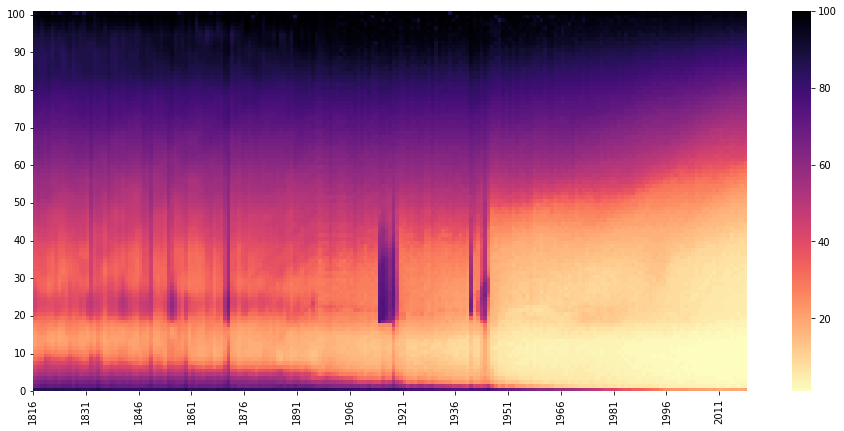

In [12]:
fig = plt.figure(figsize=(16, 7))
ax = fig.gca()
sns.heatmap(data=mortality_grid_binned,
            cmap='magma_r',
            cbar=True,
            ax=ax)
ax.set_yticks(np.arange(0, 101, 10))
ax.set_yticklabels(np.arange(0, 101, 10))
ax.set_xticks(np.arange(0, 200, 15))
ax.set_xticklabels(np.arange(1816, 2017, 15))
ax.invert_yaxis()

* We can write a function to produce the chart so we can easily make charts for any country we want.

* The function will take as parameters the country, the country file, the gender (`Male`, `Female`, or `Total`), and the dimensions of the graph.

In [13]:
def lex_heatmap(country, data_file, sex, width, height):
    
    lex = pd.read_table(data_file, skiprows=2, sep='\s+', na_values=".")
    lex.loc[lex['Age'] == '110+', 'Age'] = 110
    lex['Age'] = pd.to_numeric(lex['Age'])
    mortality_grid = pd.pivot_table(data=lex[lex['Age'] <= 100], 
                                    index='Age',
                                    columns='Year',
                                    values=sex)
    dims  = mortality_grid.shape
    mortality_grid_binned = ntile(mortality_grid.values.ravel(), 100).reshape(dims)
    fig = plt.figure(figsize=(width, height))
    ax = fig.gca()
    sns.heatmap(data=mortality_grid_binned,
            cmap='magma_r',
            cbar=True,
            ax=ax)
    min_x = mortality_grid.columns.min()
    max_x = mortality_grid.columns.max()
    min_x_label = math.ceil(min_x/5) * 5
    max_x_label = math.floor(max_x/5) * 5
    xtick_labels = np.arange(min_x_label, max_x_label+1, 15)
    xticks = xtick_labels - min_x
    ax.set_xticks(xticks)
    ax.set_xticklabels(xtick_labels, rotation=45)
    ax.set_ylim(0, 100)
    ax.set_xlabel('Year', size=16)
    ax.set_ylabel('Age', size=16)
    title = ax.set_title(f'{country}: {sex} {min_x}-{max_x}', size=16)
    title.set_position([0.5, 1.05])
    ax.set_yticks(np.arange(0, 101, 10))
    ax.set_yticklabels(np.arange(0, 101, 10), rotation=0)
    return mortality_grid

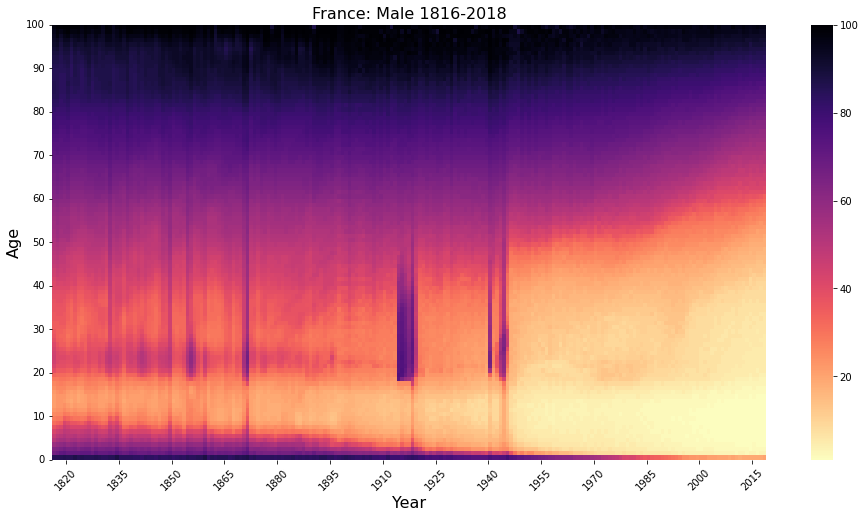

In [14]:
_ = lex_heatmap('France', 'FRATNP.Mx_1x1.txt', 'Male', 16, 8)

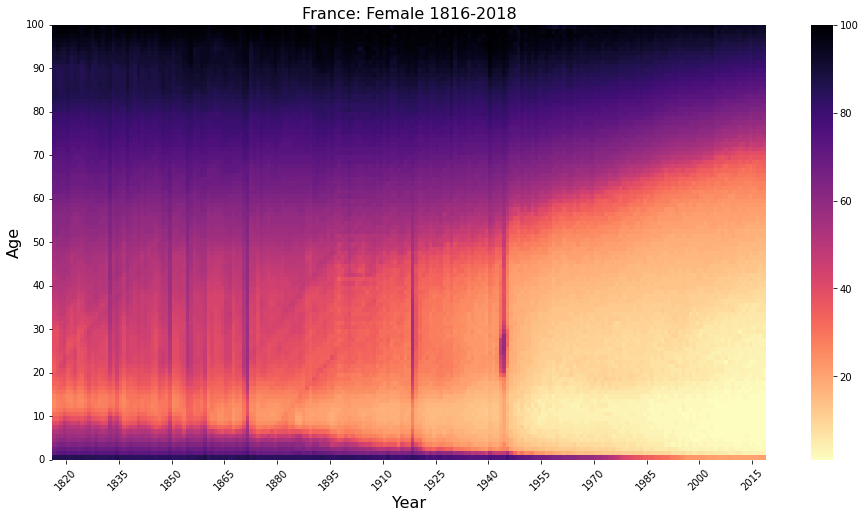

In [15]:
_ = lex_heatmap('France', 'FRATNP.Mx_1x1.txt', 'Female', 16, 8)

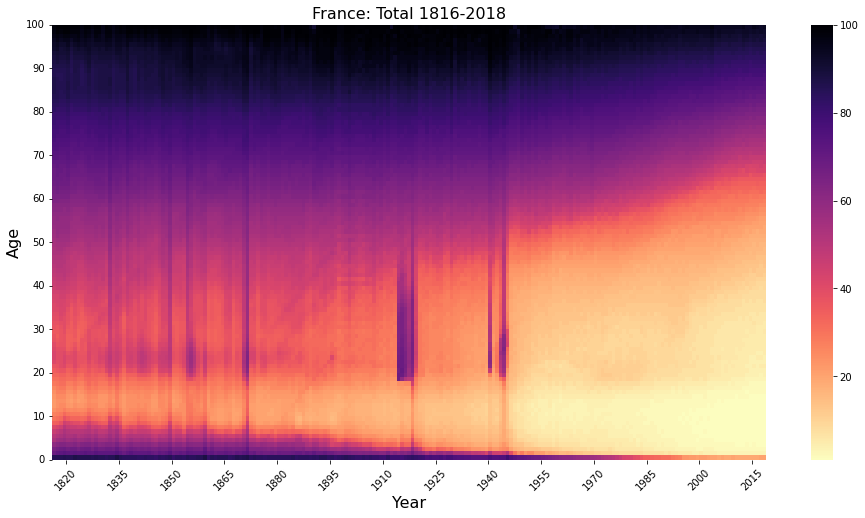

In [16]:
_ = lex_heatmap('France', 'FRATNP.Mx_1x1.txt', 'Total', 16, 8)

* It would be nice to see what happens with Greece as well.

* But unfortunately the data covers a very short period of time...

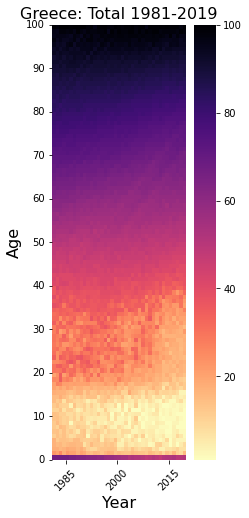

In [17]:
_ = lex_heatmap('Greece', 'GRC.Mx_1x1.txt', 'Total', 3, 8)

* We get better results with the US.

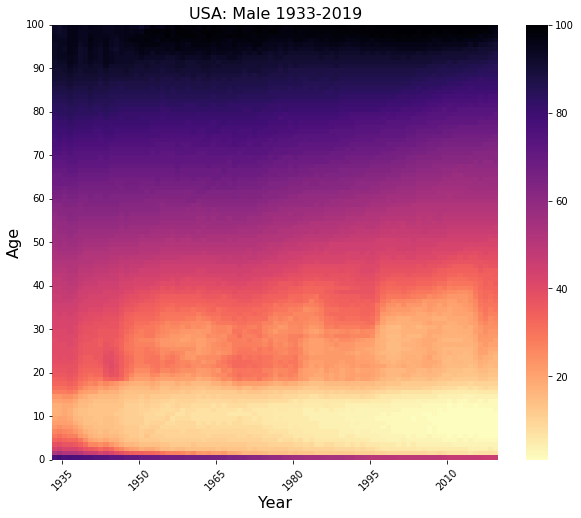

In [18]:
_ = lex_heatmap('USA', 'USA.Mx_1x1.txt', 'Male', 10, 8)

* Or with the Netherlands.

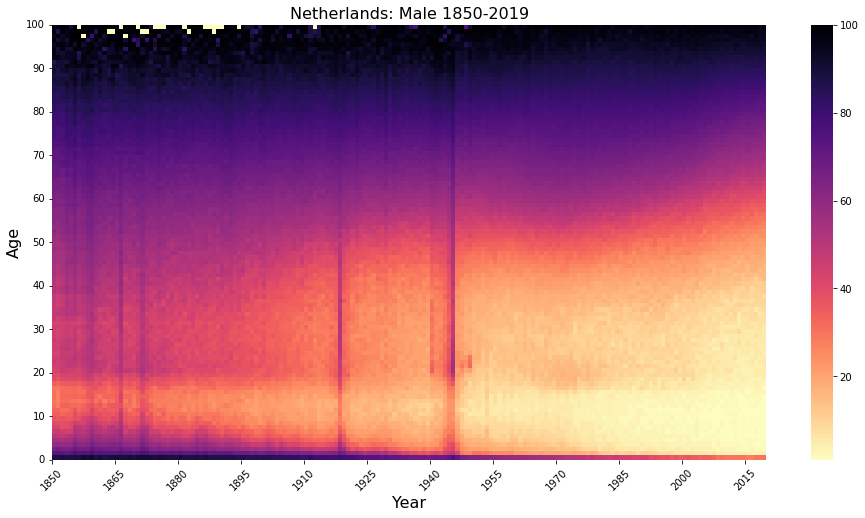

In [19]:
mortality_grid = lex_heatmap('Netherlands', 'NLD.Mx_1x1.txt', 'Male', 16, 8)

* Note the bright spots at the top of the chart.

* It seems that in those years, if you reached 100 in Holland, you didn't die!

* Indeed, we can confirm that the corresponding values ​​are zero.

In [20]:
mortality_grid.loc[mortality_grid.index > 95, 1855:1880]

Year,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,...,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880
Age,,,,,,,,,,,,,,,,,,,,,
96,0.514286,0.688525,0.571429,0.196721,0.352941,0.620690,0.324324,0.391304,0.875000,0.652174,...,0.576923,0.146341,0.734694,0.226415,0.615385,0.489796,0.315789,0.875000,0.769231,0.685714
97,0.888889,0.810811,0.000000,0.391304,0.130435,0.409091,0.727273,0.272727,0.620690,0.666667,...,0.315789,0.580645,1.600000,0.960000,0.193548,0.692308,0.909091,0.352941,0.562500,0.782609
98,1.453664,0.600000,0.500000,0.562500,1.000000,0.240000,1.000000,0.666667,0.000000,0.000000,...,0.000000,0.000000,0.666667,1.500000,1.500000,0.428571,0.375000,1.384615,0.375000,0.352941
99,0.750000,0.000000,1.200000,1.000000,1.058824,0.666667,1.636364,0.600000,0.545455,0.545455,...,1.000000,0.705882,0.272727,0.000000,0.000000,0.000000,0.545455,1.333333,1.200000,1.333333
100,2.185792,0.000000,1.383743,NaN,6.000000,1.500000,1.200000,1.200000,4.000000,0.000000,...,4.500000,6.000000,1.500000,0.923077,2.000000,0.000000,0.000000,4.000000,NaN,NaN
